In [1]:
import os
import torch
from utils import *
from model import *

dataset = MyDataset()
torch.manual_seed(23)
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [0.8, 0.2],
                                                            generator=torch.Generator().manual_seed(23))

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=128, shuffle=False, num_workers=4)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=128, shuffle=False, num_workers=4)

LOAD_MODEL = False
device = 'cuda:0' if torch.cuda.is_available() else "cpu"
lr = 0.00005
epochs = 20


Data Loaded Successfully!


In [8]:
next(iter(train_loader))[0].shape

tensor([[[[107., 108., 107.,  ...,  81.,  81.,  81.],
          [107., 108., 107.,  ...,  83.,  83.,  83.],
          [110., 109., 108.,  ...,  84.,  84.,  84.],
          ...,
          [ 68.,  67.,  67.,  ...,  48.,  48.,  46.],
          [ 67.,  67.,  67.,  ...,  47.,  47.,  46.],
          [ 67.,  66.,  66.,  ...,  46.,  46.,  47.]],

         [[126., 127., 126.,  ..., 102., 102., 102.],
          [126., 127., 126.,  ..., 101., 101., 101.],
          [127., 128., 127.,  ..., 102., 102., 102.],
          ...,
          [ 69.,  68.,  68.,  ...,  49.,  47.,  47.],
          [ 68.,  68.,  68.,  ...,  46.,  48.,  47.],
          [ 68.,  67.,  67.,  ...,  47.,  47.,  48.]],

         [[168., 169., 168.,  ..., 147., 147., 147.],
          [168., 169., 168.,  ..., 147., 147., 147.],
          [170., 170., 169.,  ..., 148., 148., 148.],
          ...,
          [ 73.,  70.,  70.,  ...,  53.,  52.,  51.],
          [ 72.,  70.,  70.,  ...,  51.,  52.,  51.],
          [ 72.,  69.,  69.,  ...

Training
Epoch: 0
Entering into train function
0 10 20 30 40 50 Validation
0.83 0.84 0.83 0.84 0.84 0.84 0.84 0.84 0.84 0.84 0.84 0.84 0.84 0.84 0.84 [Loss: 1.77] Epoch completed and model saved!
Epoch: 1
Entering into train function
0 10 20 30 40 50 Validation
0.84 0.85 0.84 0.85 0.85 0.85 0.85 0.85 0.85 0.85 0.85 0.85 0.84 0.85 0.85 [Loss: 1.03] Epoch completed and model saved!
Epoch: 2
Entering into train function
0 10 20 30 40 50 Validation
0.84 0.85 0.84 0.85 0.85 0.85 0.85 0.85 0.85 0.85 0.85 0.85 0.85 0.85 0.85 [Loss: 0.73] Epoch completed and model saved!
Epoch: 3
Entering into train function
0 10 20 30 40 50 Validation
0.84 0.85 0.85 0.85 0.85 0.85 0.86 0.85 0.85 0.85 0.85 0.85 0.85 0.85 0.85 [Loss: 0.60] Epoch completed and model saved!
Epoch: 4
Entering into train function
0 10 20 30 40 50 Validation
0.85 0.86 0.86 0.86 0.86 0.86 0.86 0.86 0.86 0.86 0.86 0.86 0.86 0.86 0.86 [Loss: 0.52] Epoch completed and model saved!
Epoch: 5
Entering into train function
0 10 20 30 40 50 V

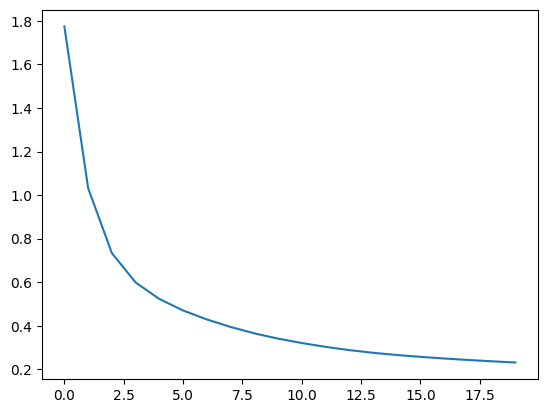

In [4]:
layers=[3, 64]

# Defining the model, optimizer and loss function
unet = UNET(layers=layers, classes=10).to(device) # [3, 64, 128] # 256, 512, 1024
ignore_index = True
if ignore_index:
    loss_function = nn.CrossEntropyLoss(ignore_index=255)   # why?
else:
    loss_function = nn.CrossEntropyLoss()


now = datetime.now()  # current date and time
date_time = now.strftime("%m_%d_%H_%M_%S")
model_name = str(layers)[1:-1].replace(', ', '_')

global epoch
epoch = 0 # epoch is initially assigned to 0. If LOAD_MODEL is true then
          # epoch is set to the last value + 1.
LOSS_VALS = [] # Defining a list to store loss values after every epoch

# Loading a previous stored model from MODEL_PATH variable
if LOAD_MODEL == True:
    MODEL_PATH_SHORT = f'teacher_l{model_name}_e{epochs}_ii{ignore_index}_lr{lr}'
    files = os.listdir('.')
    MODEL_PATH = [f for f in files if MODEL_PATH_SHORT in f][0]
    checkpoint = torch.load(MODEL_PATH, map_location=torch.device('cpu'))
    unet.load_state_dict(checkpoint['model_state_dict'])
    # optimizer.load_state_dict(checkpoint['optim_state_dict'])
    # epoch = checkpoint['epoch']+1
    # LOSS_VALS = checkpoint['loss_values']
    del checkpoint # memory constraint
    print("Model successfully loaded!")

elif LOAD_MODEL == False:
    unet = unet.train()
    optimizer = optim.Adam(unet.parameters(), lr=lr)
    MODEL_PATH = f'teacher_l{model_name}_e{epochs}_lr{lr}_d{date_time}'
    print('Training')
    #Training the model for every epoch.
    for e in range(epoch, epochs):
        print(f'Epoch: {e}')
        loss_val = train_function(train_loader, unet, optimizer, loss_function, device)
        print('Validation')
        val, preds_c, y = validation(unet, test_loader, device)
        LOSS_VALS.append(loss_val)
        print(f"[Loss: {np.mean(loss_val):.2f}] Epoch completed and model saved!")

    MODEL_PATH = f'v{val:.2f}_{MODEL_PATH}'
    torch.save({
            'model_state_dict': unet.state_dict(),
            'optim_state_dict': optimizer.state_dict(),
            'epoch': e,
            'loss_values': LOSS_VALS
        }, MODEL_PATH)

plt.plot(np.mean(np.array(LOSS_VALS),axis=1));

### Inference

In [34]:
val, preds_c, y = validation(unet, test_loader, device)


0.97 0.97 0.97 0.97 0.97 0.97 0.97 0.97 0.97 0.97 0.97 0.97 0.97 0.97 0.97 

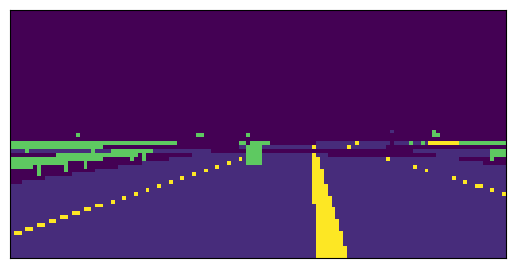

In [26]:
# fig, (ax1, ax2) = plt.subplots(1,2)
# plt.imshow(preds_c.cpu()[50])
plt.imshow(y.cpu()[50])
plt.xticks([])
plt.yticks([])
plt.savefig(f'{MODEL_PATH}_{50}_y.jpg')
# plt.savefig(f'{MODEL_PATH}_{50}.jpg')
# ax2.imshow(y[50])

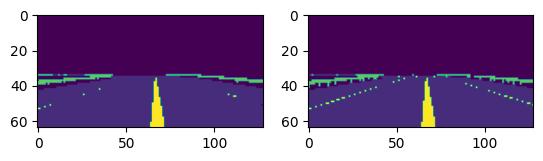

In [35]:
soft = torch.nn.Softmax(dim=0)

idx = 0
img = preds_c[idx].cpu()
fig, (ax1, ax2) = plt.subplots(1,2)

ax1.imshow(img);
ax2.imshow(y[idx]);


---
# Distillation
Try distillation on the fly, teacher that generate ground truth, this is not quite the logits distillation


In [9]:
teacher = UNET(layers=[3, 64, 128] , classes=10).to(device) # [3, 64, 128] # 256, 512, 1024
TEACHER_PATH = 'v0.97_teacher_l3_64_128_e10_lr5e-05_d05_07_23_04_02'
checkpoint = torch.load(TEACHER_PATH, map_location=torch.device(device))
teacher.load_state_dict(checkpoint['model_state_dict'])

now = datetime.now()  # current date and time
date_time = now.strftime("%m_%d_%H_%M_%S")

layers = [3, 64]
# Defining the model, optimizer and loss function
student = UNET(layers=layers, classes=10).to(device).train()


model_name = str(layers)[1:-1].replace(', ', '_')
STUDENT_PATH = f'student_l{model_name}_e{epochs}_lr{lr}_d{date_time}'

optimizer_s = optim.Adam(student.parameters(), lr=lr)

In [5]:
def get_n_params(model):
    pp=0
    for p in list(model.parameters()):
        nn=1
        for s in list(p.size()):
            nn = nn*s
        pp += nn
    return pp

get_n_params(teacher), get_n_params(student)

(404618, 39434)

here
Epoch: 0
Entering into train function
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 [Loss: 5.20] Epoch completed and model saved!
0.83 0.84 0.84 0.84 0.84 0.84 0.84 0.84 0.84 0.84 0.84 0.84 0.84 0.84 0.84 Epoch: 1
Entering into train function
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 [Loss: 3.56] Epoch completed and model saved!
0.83 0.84 0.84 0.84 0.84 0.84 0.84 0.84 0.84 0.84 0.84 0.84 0.84 0.84 0.84 Epoch: 2
Entering into train function
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 [Loss: 2.28] Epoch completed and model saved!
0.83 0.84 0.84 0.84 0.84 0.84 0.85 0.84 0.84 0.84 0.84 0.84 0.84 0.84 0.84 Epoch: 3

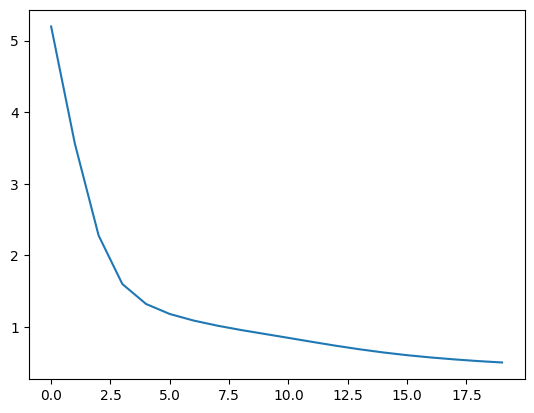

In [10]:
print('here')
epochs = 20
LOSS_VALS = []
for e in range(0, epochs):
        print(f'Epoch: {e}')
        loss_val = train_function_distillation(train_loader, teacher, student, optimizer_s, device)
        print(f"[Loss: {np.mean(loss_val):.2f}] Epoch completed and model saved!")
        LOSS_VALS.append(loss_val)

        val, preds_c, y = validation(student, test_loader, device)

STUDENT_PATH = f'v{val:.2f}_{STUDENT_PATH}_{TEACHER_PATH}'
torch.save({
    'model_state_dict': student.state_dict(),
    'optim_state_dict': optimizer_s.state_dict(),
    'epoch': e,
    'loss_values': LOSS_VALS
}, STUDENT_PATH)
plt.plot(np.mean(np.array(LOSS_VALS),axis=1));

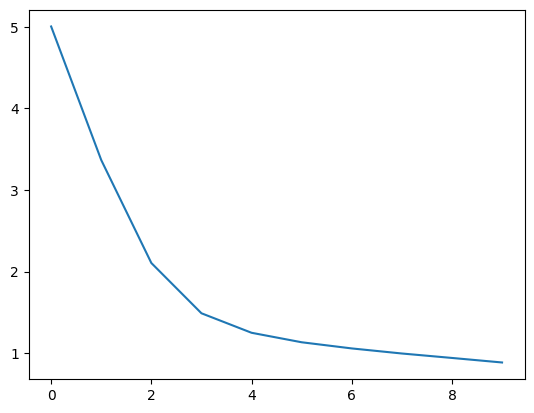

In [7]:
# val, preds_c, y = validation(student, test_loader, device)


torch.Size([27, 10, 64, 128])

0.90 0.91 0.91 0.91 0.91 0.91 0.91 0.91 0.91 0.91 0.91 0.91 0.91 0.91 0.91 

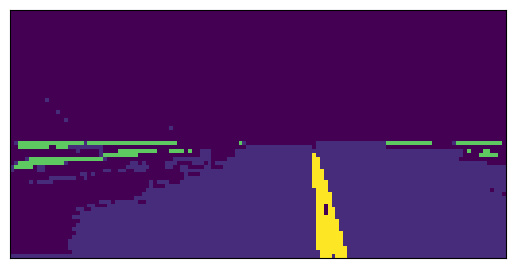

In [3]:
STUDENT_PATH ='v0.91_student_l3_64_e20_lr5e-05_d05_07_23_38_10'
checkpoint = torch.load(STUDENT_PATH, map_location=torch.device('cuda:0'))
student = UNET(layers=[3, 64], classes=10).to(device).train()

student.load_state_dict(checkpoint['model_state_dict'])

val, preds_c, y = validation(student, test_loader, device)

idx = 50
# preds_class.shape, y.shape
# fig, (ax1, ax2) = plt.subplots(2,1)
plt.imshow(preds_c.cpu()[idx])
# ax2.imshow(y.cpu()[idx])

plt.xticks([])
plt.yticks([])
plt.savefig(f'{STUDENT_PATH}_{50}_y.jpg')

In [ ]:
# # plt.imshow(preds_c.cpu()[50])
# plt.imshow(y.cpu()[50])
# plt.xticks([])
# plt.yticks([])
# plt.savefig(f'{MODEL_PATH}_{50}_y.jpg')